# Project - MAT 328 Techniques In Data Science

## New York State Tuition Assistance Program (TAP) Grants Data Analysis

### 1. Loading and cleaning the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [2]:
nys_tap_data = pd.read_csv("TAP_Recipients_Dollars_by_College__Sector_Group_and_Level_of_Study.csv")

In [3]:
nys_tap_data.head()

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,2000,5151,9895,G,Grad,YESHIVA UNIV GRAD/PROFESSIONAL,PRIVATE,5-INDEPENDENT,135,121.00,46715.50
1,2000,955,2853,U,5 yr Undergrad,SUNY MARITIME COLLEGE,PUBLIC,3-SUNY SO,5,4.00,12420.00
2,2000,5142,2894,G,Grad,UNIV OF ROCHESTER SIMON SCH BUS,PRIVATE,5-INDEPENDENT,11,6.67,3495.28
3,2000,5141,4828,G,Grad,UNIV OF ROCHESTER EASTMAN GRAD,PRIVATE,5-INDEPENDENT,9,6.75,1229.75
4,2000,535,20662,U,2 yr Undergrad,THE NEW SCHOOL 4YR UNDERGRAD,PRIVATE,5-INDEPENDENT,15,13.75,39434.75


In [4]:
# Number of rows in the dataset
len(nys_tap_data)

10664

In [5]:
# Filter the dataframe to include only CUNY Colleges from 2010 to 2019 Academic Year 

cuny_tap_data = nys_tap_data[(nys_tap_data["Academic Year"] >= 2010) 
                            & ((nys_tap_data["TAP Sector Group"] == "1-CUNY SR")
                            | (nys_tap_data["TAP Sector Group"] == "2-CUNY CC"))]
cuny_tap_data.head()

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
6239,2010,1405,2696,U,5 yr Undergrad,CUNY NYC COLLEGE OF TECHNOLOGY,PUBLIC,1-CUNY SR,39,26.42,107197.83
6240,2010,1404,2691,U,2 yr Undergrad,CUNY MANHATTAN CC,PUBLIC,2-CUNY CC,9336,6341.38,15492174.65
6241,2010,1412,7022,U,4 yr Undergrad,CUNY HERBERT H LEHMAN COLLEGE,PUBLIC,1-CUNY SR,4269,3277.46,11229297.87
6242,2010,1415,10097,U,4 yr Undergrad,CUNY MEDGER EVERS COLLEGE,PUBLIC,1-CUNY SR,1675,1223.67,4302152.72
6243,2010,1414,2693,U,2 yr Undergrad,CUNY JOHN JAY COLLEGE,PUBLIC,1-CUNY SR,565,375.42,1335536.61


In [6]:
# Drop the Sector Type column because we know CUNY Colleges are public colleges
# Drop the Level, TAP College Code and Federal School code columns because it's not useful in this analysis
cuny_tap_data = cuny_tap_data.drop(columns = ["TAP College Code", "Federal School Code", "Level", "Sector Type"])

In [7]:
cuny_tap_data.head()

,Academic Year,TAP Level of Study,TAP College Name,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
6239,2010,5 yr Undergrad,CUNY NYC COLLEGE OF TECHNOLOGY,1-CUNY SR,39,26.42,107197.83
6240,2010,2 yr Undergrad,CUNY MANHATTAN CC,2-CUNY CC,9336,6341.38,15492174.65
6241,2010,4 yr Undergrad,CUNY HERBERT H LEHMAN COLLEGE,1-CUNY SR,4269,3277.46,11229297.87
6242,2010,4 yr Undergrad,CUNY MEDGER EVERS COLLEGE,1-CUNY SR,1675,1223.67,4302152.72
6243,2010,2 yr Undergrad,CUNY JOHN JAY COLLEGE,1-CUNY SR,565,375.42,1335536.61


In [8]:
# Drop all the rows in the dataset with the College Names ('CUNY GRAD SCH UNDERGRAD PROG' 
# and 'CUNY GRAD CTR-SCHOL OF LABOR UG') because we want to analyze TAP grants awarded to
# to CUNY Senior Colleges and Community Colleges

cuny_tap_data = cuny_tap_data[(cuny_tap_data["TAP College Name"] != "CUNY GRAD SCH UNDERGRAD PROG") 
                             & (cuny_tap_data["TAP College Name"] != "CUNY GRAD CTR-SCHOL OF LABOR UG")]

In [9]:
# Remove rows with CUNY Community Colleges having 4 year(Bachelors) & 5 year(Comnibed Bachelors/Masters)
# programs. I believe this is an error in the dataset because CUNY Community Colleges do not have 5 year programs
cuny_tap_data = cuny_tap_data[(cuny_tap_data["TAP Sector Group"] == "1-CUNY SR") 
                                 | ((cuny_tap_data["TAP Sector Group"] == "2-CUNY CC") 
                                 & ((cuny_tap_data["TAP Level of Study"] != "4 yr Undergrad")
                                 & (cuny_tap_data["TAP Level of Study"] != "5 yr Undergrad")))]

In [10]:
len(cuny_tap_data)

326

In [11]:
# Make the TAP College Name the very first column in the dataframe

college_name_column = cuny_tap_data["TAP College Name"]
cuny_tap_data.drop(columns = ["TAP College Name"], inplace = True)
cuny_tap_data.insert(0, "TAP College Name", college_name_column)

In [12]:
cuny_tap_data.head()

,TAP College Name,Academic Year,TAP Level of Study,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
6239,CUNY NYC COLLEGE OF TECHNOLOGY,2010,5 yr Undergrad,1-CUNY SR,39,26.42,107197.83
6240,CUNY MANHATTAN CC,2010,2 yr Undergrad,2-CUNY CC,9336,6341.38,15492174.65
6241,CUNY HERBERT H LEHMAN COLLEGE,2010,4 yr Undergrad,1-CUNY SR,4269,3277.46,11229297.87
6242,CUNY MEDGER EVERS COLLEGE,2010,4 yr Undergrad,1-CUNY SR,1675,1223.67,4302152.72
6243,CUNY JOHN JAY COLLEGE,2010,2 yr Undergrad,1-CUNY SR,565,375.42,1335536.61


In [13]:
# Sort the data by the College Name and Academic Year, and reindex the rows

cuny_tap_data = cuny_tap_data.sort_values(["TAP College Name", "Academic Year"])
cuny_tap_data.reset_index(drop = True, inplace = True)
cuny_tap_data.head()

,TAP College Name,Academic Year,TAP Level of Study,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,CUNY BARUCH COLLEGE,2010,5 yr Undergrad,1-CUNY SR,105,72.75,304788.75
1,CUNY BARUCH COLLEGE,2010,4 yr Undergrad,1-CUNY SR,5714,4716.21,15899669.13
2,CUNY BARUCH COLLEGE,2011,5 yr Undergrad,1-CUNY SR,109,79.75,366793.75
3,CUNY BARUCH COLLEGE,2011,4 yr Undergrad,1-CUNY SR,5970,5049.04,18694666.97
4,CUNY BARUCH COLLEGE,2012,5 yr Undergrad,1-CUNY SR,125,85.00,392550.75


In [14]:
cuny_tap_data[(cuny_tap_data["TAP Recipient Dollars"] >= 30000000)]

,TAP College Name,Academic Year,TAP Level of Study,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
202,CUNY MANHATTAN CC,2015,2 yr Undergrad,2-CUNY CC,12602,8962.25,33935260.20
203,CUNY MANHATTAN CC,2016,2 yr Undergrad,2-CUNY CC,12101,8697.00,32618705.31
204,CUNY MANHATTAN CC,2017,2 yr Undergrad,2-CUNY CC,11895,8569.58,31888202.85


### 2. Single Variable Distribution Plots

Text(0, 0.5, '# of TAP grants received')

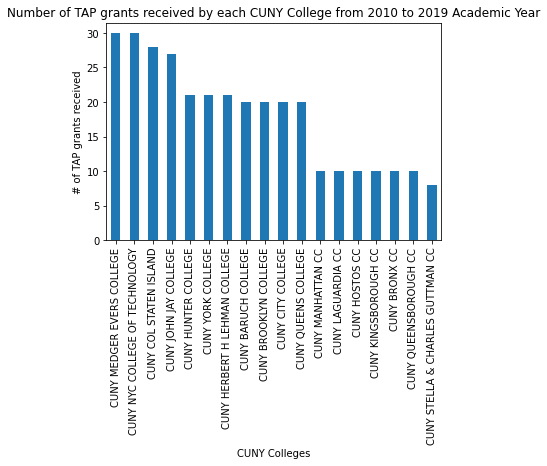

In [15]:
cuny_tap_data["TAP College Name"].value_counts().plot.bar()
plt.title("Number of TAP grants received by each CUNY College from 2010 to 2019 Academic Year")
plt.xlabel("CUNY Colleges")
plt.ylabel("# of TAP grants received")

Text(0, 0.5, '# of TAP grants received')

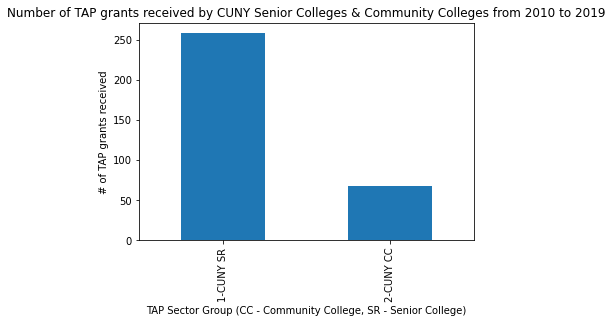

In [16]:
cuny_tap_data["TAP Sector Group"].value_counts().plot.bar()
plt.title("Number of TAP grants received by CUNY Senior Colleges & Community Colleges from 2010 to 2019")
plt.xlabel("TAP Sector Group (CC - Community College, SR - Senior College)")
plt.ylabel("# of TAP grants received")

Text(0, 0.5, 'Frequency')

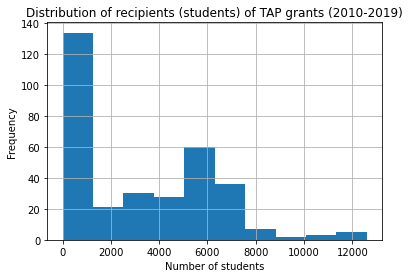

In [17]:
cuny_tap_data["TAP Recipient Headcount"].hist()
plt.title("Distribution of recipients (students) of TAP grants (2010-2019)")
plt.xlabel("Number of students")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

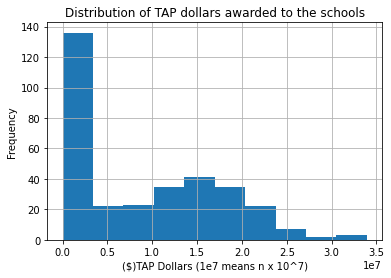

In [18]:
cuny_tap_data["TAP Recipient Dollars"].hist()
plt.title("Distribution of TAP dollars awarded to the schools")
plt.xlabel("($)TAP Dollars (1e7 means n x 10^7)")
plt.ylabel("Frequency")

### 3. Multiple Variable Distribution Plots

Text(0.5, 6.79999999999999, 'Academic Year (2010-2019)')

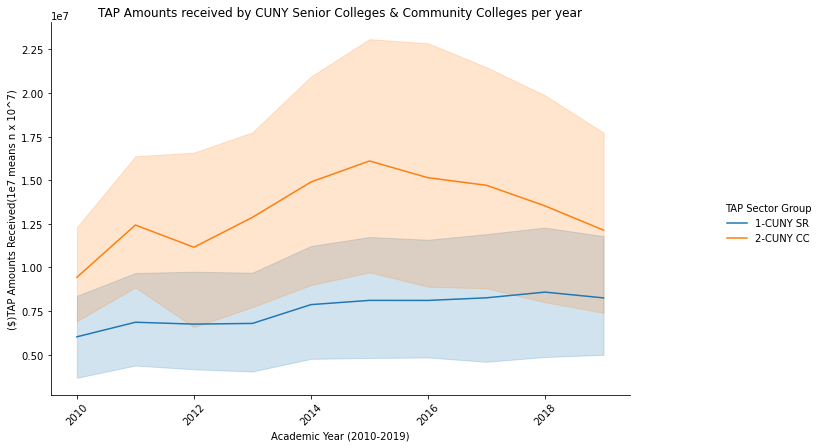

In [19]:
# Plot the graph
g=sns.relplot(x ="Academic Year", y ="TAP Recipient Dollars", kind ="line", hue ="TAP Sector Group", data=cuny_tap_data)

# Resize the graph
g.fig.set_size_inches(12,6)
plt.xticks(rotation=45)

# Title and axes labels added to the graph
plt.title("TAP Amounts received by CUNY Senior Colleges & Community Colleges per year")
plt.ylabel("($)TAP Amounts Received(1e7 means n x 10^7)")
plt.xlabel("Academic Year (2010-2019)")

Text(0.5, 6.79999999999999, 'CUNY College')

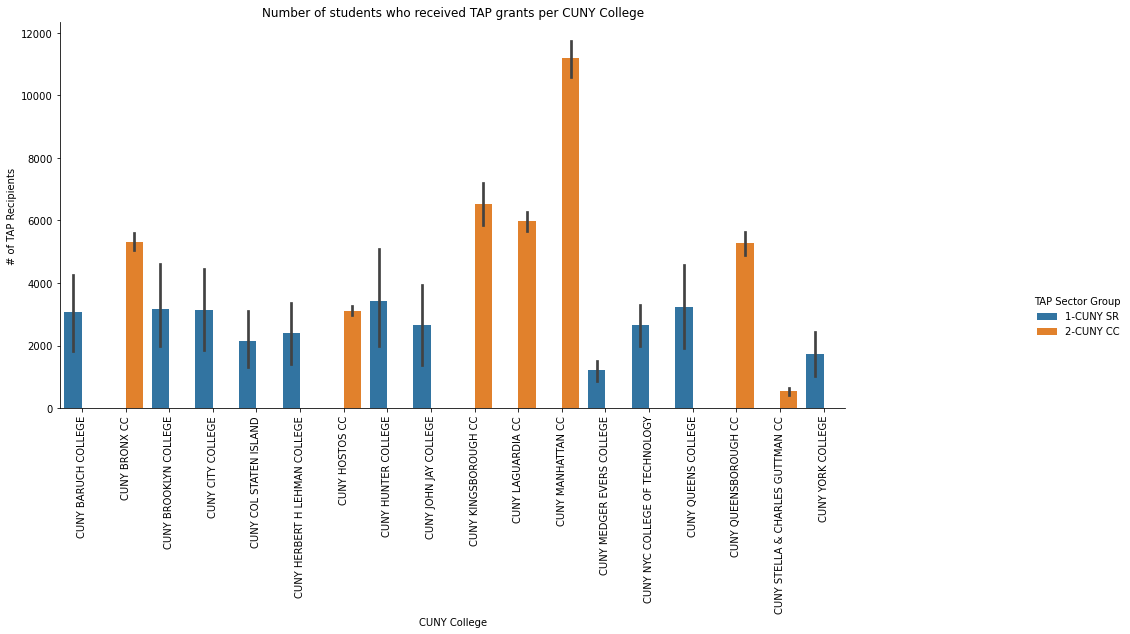

In [20]:
g=sns.catplot(x="TAP College Name", y ="TAP Recipient Headcount", hue ="TAP Sector Group", kind ="bar", data=cuny_tap_data)

# Resize the graph
g.fig.set_size_inches(18,6)
plt.xticks(rotation=90)

# Title and axes labels added to the graph
plt.title("Number of students who received TAP grants per CUNY College")
plt.ylabel("# of TAP Recipients")
plt.xlabel("CUNY College")

## Dummy variables

In [21]:
#  create dummy variables from the qualitative columns
cuny_tap_data_new = pd.get_dummies(cuny_tap_data, columns = ["TAP Sector Group", "TAP Level of Study"], drop_first = True)

In [22]:
cuny_tap_data_new.head()

,TAP College Name,Academic Year,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars,TAP Sector Group_2-CUNY CC,TAP Level of Study_4 yr Undergrad,TAP Level of Study_5 yr Undergrad
0,CUNY BARUCH COLLEGE,2010,105,72.75,304788.75,0,0,1
1,CUNY BARUCH COLLEGE,2010,5714,4716.21,15899669.13,0,1,0
2,CUNY BARUCH COLLEGE,2011,109,79.75,366793.75,0,0,1
3,CUNY BARUCH COLLEGE,2011,5970,5049.04,18694666.97,0,1,0
4,CUNY BARUCH COLLEGE,2012,125,85.00,392550.75,0,0,1


## 1st Data - This has x as it's independent variables and y as the dependent variable (TAP Recipient Dollars)

In [23]:
# create a new DataFrame using TAP Recipient Headcount,  TAP Recipient FTEs,
# TAP Sector Group_2-CUNY CC, TAP Level of Study_4 yr Undergrad, and 
#  TAP Level of Study_5 yr Undergrad as independent variables

x = cuny_tap_data_new.drop(columns = ["TAP College Name", "Academic Year", "TAP Recipient Dollars"])

In [24]:
x.head()

,TAP Recipient Headcount,TAP Recipient FTEs,TAP Sector Group_2-CUNY CC,TAP Level of Study_4 yr Undergrad,TAP Level of Study_5 yr Undergrad
0,105,72.75,0,0,1
1,5714,4716.21,0,1,0
2,109,79.75,0,0,1
3,5970,5049.04,0,1,0
4,125,85.00,0,0,1


In [25]:
# create a new Series of the dependent variable

y = cuny_tap_data_new["TAP Recipient Dollars"]
y.head()

0      304788.75
1    15899669.13
2      366793.75
3    18694666.97
4      392550.75
Name: TAP Recipient Dollars, dtype: float64

### split the first data into 80% training data and 20% testing data


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
x_train.head()

,TAP Recipient Headcount,TAP Recipient FTEs,TAP Sector Group_2-CUNY CC,TAP Level of Study_4 yr Undergrad,TAP Level of Study_5 yr Undergrad
0,105,72.75,0,0,1
254,42,27.29,0,0,1
28,5142,3657.67,1,0,0
275,130,100.75,0,0,1
216,18,10.50,0,0,1


In [28]:
y_train.head()

0        304788.75
254      129321.62
28     13853713.13
275      470182.25
216       46477.00
Name: TAP Recipient Dollars, dtype: float64

## 2nd Data - This has x2 as it's independent variables and y2 as the dependent variable (TAP Recipient Dollars)


Create a new DataFrame dropping some of the independent variables from the first data. This can help us 
have an insight into which parameter/parameters(independent variable(s)) when used with all the models 
can get the best predictions for the data

In [29]:
x2 = cuny_tap_data_new.drop(columns = ["TAP College Name", "Academic Year", "TAP Recipient Dollars", 
                                       "TAP Recipient FTEs", "TAP Recipient Headcount"])
x2.head()

,TAP Sector Group_2-CUNY CC,TAP Level of Study_4 yr Undergrad,TAP Level of Study_5 yr Undergrad
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [30]:
# create a new Series of the dependent variable
y2 = cuny_tap_data_new["TAP Recipient Dollars"]
y2.head()

0      304788.75
1    15899669.13
2      366793.75
3    18694666.97
4      392550.75
Name: TAP Recipient Dollars, dtype: float64

### split the second data into 80% training data and 20% testing data


In [31]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)

## Linear Regression Model

Apply Linear Regression model on the **First Data** which has ***TAP Recipient Headcount, TAP Recipient FTEs, TAP Sector Group_2-CUNY CC, TAP Level of Study_4 yr Undergrad and TAP Level of Study_5 yr Undergrad*** as the **Independent variables**

In [32]:
# Initialize the linear regression model
linear_model1 = LinearRegression()

# fit the model to the training data
linear_model1.fit(x_train, y_train)

LinearRegression()

In [33]:
# use this linear regression model to make predictions for the test data
y_test_preds_lin = linear_model1.predict(x_test)

In [34]:
# compute the mean squared error of the predictions for the test data
mean_squared_error(y_test_preds_lin, y_test)

1285947057115.0415

In [69]:
# use this linear regression model to make predictions for the train data
y_train_preds_lin = linear_model1.predict(x_train)

In [70]:
# compute the mean squared error of the predictions for the train data
mean_squared_error(y_train_preds_lin, y_train)

787051727239.5916

MSE test: 1285947057115  ---> Overfitting
MSE train: 787051727239

In [74]:
lm.resid

NameError: name 'lm' is not defined

Apply Linear Regression Model on the **Second Data** which has ***TAP Sector Group_2-CUNY CC, TAP Level of Study_4 yr Undergrad and TAP Level of Study_5 yr Undergrad*** as the **Independent variables**.

This data has all the Independent variables in the first data with the exception of two that were dropped ***(TAP Recipient Headcount, TAP Recipient FTEs)***

In [35]:
# Initialize the linear regression model
linear_model2 = LinearRegression()

# fit the model to the training data
linear_model2.fit(x2_train, y2_train)

LinearRegression()

In [36]:
# use this linear regression model to make predictions for the test data
y2_test_preds_lin = linear_model2.predict(x2_test)

In [37]:
# compute the mean squared error of these linear regression model predictions
mean_squared_error(y2_test_preds_lin, y2_test)

17944470672660.06

In [71]:
# use this linear regression model to make predictions for the train data
y2_train_preds_lin = linear_model2.predict(x2_train)

In [72]:
# compute the mean squared error of the predictions for the train data
mean_squared_error(y2_train_preds_lin, y2_train)

24922501116120.234

MSE test: 17944470672660  ---> Underfitting
MSE train: 24922501116120

## Decision Tree Regression Model


Apply Decision Tree model on the **First Data** which has ***TAP Recipient Headcount, TAP Recipient FTEs, TAP Sector Group_2-CUNY CC, TAP Level of Study_4 yr Undergrad and TAP Level of Study_5 yr Undergrad*** as the **Independent variables**

In [38]:
tree_model1 = DecisionTreeRegressor(max_depth = 5)
tree_model1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [39]:
y_test_preds_tree = tree_model1.predict(x_test)

In [40]:
mean_squared_error(y_test_preds_tree, y_test)

3076982093318.453

In [41]:
tree_model1_mses = []
for i in range(1,10):
    tree = DecisionTreeRegressor(max_depth = i)
    tree.fit(x_train, y_train)
    y_pred_tree = tree.predict(x_test)
    mse = mean_squared_error(y_pred_tree, y_test)
    tree_model1_mses.append(mse)
    print(f"MSE for max depth {i} is { tree_model1_mses[i-1]}")


MSE for max depth 1 is 15887027050517.252
MSE for max depth 2 is 7242281492691.231
MSE for max depth 3 is 4423443024028.058
MSE for max depth 4 is 3087436509472.0684
MSE for max depth 5 is 2270686388417.002
MSE for max depth 6 is 3314594049297.152
MSE for max depth 7 is 3221210391618.288
MSE for max depth 8 is 2379172584321.8965
MSE for max depth 9 is 3136265882364.2207


Text(0.5, 1.0, 'MSE of different max depths for the 1st data')

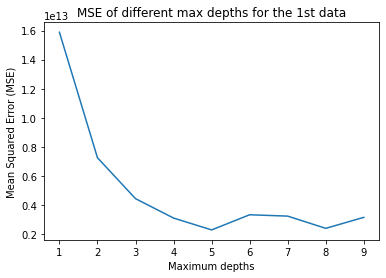

In [42]:
plt.plot([1,2,3,4,5,6,7,8,9], tree_model1_mses)
plt.xlabel("Maximum depths")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE of different max depths for the 1st data")

Apply Decision Tree model on the **Second Data** which has ***TAP Sector Group_2-CUNY CC, TAP Level of Study_4 yr Undergrad and TAP Level of Study_5 yr Undergrad*** as the **Independent variables**.

This data has all the Independent variables in the first data with the exception of two that were dropped ***(TAP Recipient Headcount, TAP Recipient FTEs)***

In [43]:
tree_model2 = DecisionTreeRegressor(max_depth = 5)
tree_model2.fit(x2_train, y2_train)

DecisionTreeRegressor(max_depth=5)

In [44]:
y2_test_preds_tree = tree_model2.predict(x2_test)

In [45]:
mean_squared_error(y2_test_preds_tree, y2_test)

17944470672660.05

In [46]:
tree_model2_mses = []
for i in range(1,10):
    tree = DecisionTreeRegressor(max_depth = i)
    tree.fit(x2_train, y2_train)
    y2_pred_tree = tree.predict(x2_test)
    mse = mean_squared_error(y2_pred_tree, y2_test)
    tree_model2_mses.append(mse)
    print(f"MSE for max depth {i} is { tree_model2_mses[i-1]}")


MSE for max depth 1 is 33779826269747.03
MSE for max depth 2 is 21936585521446.04
MSE for max depth 3 is 17944470672660.08
MSE for max depth 4 is 17944470672660.047
MSE for max depth 5 is 17944470672660.066
MSE for max depth 6 is 17944470672660.047
MSE for max depth 7 is 17944470672660.08
MSE for max depth 8 is 17944470672660.062
MSE for max depth 9 is 17944470672660.066


Text(0.5, 1.0, 'MSE of different max depths for the 2nd data')

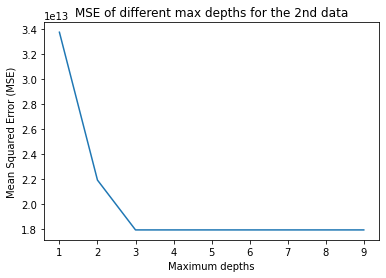

In [47]:
plt.plot([1,2,3,4,5,6,7,8,9], tree_model2_mses)
plt.xlabel("Maximum depths")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE of different max depths for the 2nd data")

## K-Neighbours Regression Model


Apply K-Neighbours Model on the **First Data** which has ***TAP Recipient Headcount, TAP Recipient FTEs, TAP Sector Group_2-CUNY CC, TAP Level of Study_4 yr Undergrad and TAP Level of Study_5 yr Undergrad*** as the **Independent variables**

In [48]:
knn_model1 = KNeighborsRegressor(n_neighbors=3)
knn_model1.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [49]:
y_test_pred_knn = knn_model1.predict(x_test)

In [50]:
mean_squared_error(y_test_pred_knn, y_test)

2635912455668.718

In [51]:
knn_model1_mses = []
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    mse = mean_squared_error(y_pred_knn, y_test)
    knn_model1_mses.append(mse)
    print(f"MSE for k = {i} is { knn_model1_mses[i-1]}")

MSE for k = 1 is 2689649323485.4985
MSE for k = 2 is 2605123675141.1025
MSE for k = 3 is 2635912455668.718
MSE for k = 4 is 2763477190219.9453
MSE for k = 5 is 2440269165124.841
MSE for k = 6 is 2341696859256.106
MSE for k = 7 is 1859614064960.155
MSE for k = 8 is 1968070901206.3418
MSE for k = 9 is 1890562798053.1965


Text(0.5, 1.0, 'MSE for diff. # of neighbors for the 1st data')

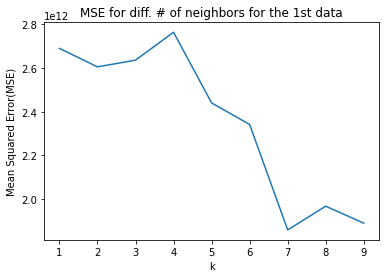

In [52]:
plt.plot([1,2,3,4,5,6,7,8,9], knn_model1_mses)
plt.xlabel("k")
plt.ylabel("Mean Squared Error(MSE)")
plt.title("MSE for diff. # of neighbors for the 1st data")

Apply K-Neighbours Model on the **Second Data** which has ***TAP Sector Group_2-CUNY CC, TAP Level of Study_4 yr Undergrad and TAP Level of Study_5 yr Undergrad*** as the **Independent variables**.

This data has all the Independent variables in the first data with the exception of two that were dropped ***(TAP Recipient Headcount, TAP Recipient FTEs)***

In [53]:
knn_model2 = KNeighborsRegressor(n_neighbors = 6)
knn_model2.fit(x2_train, y2_train)

KNeighborsRegressor(n_neighbors=6)

In [54]:
y2_test_pred_knn = knn_model2.predict(x2_test)

In [55]:
mean_squared_error(y2_test_pred_knn, y2_test)

17370703090004.451

In [56]:
knn_model2_mses = []
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x2_train, y2_train)
    y2_pred_knn = knn.predict(x2_test)
    mse = mean_squared_error(y2_pred_knn, y2_test)
    knn_model2_mses.append(mse)
    print(f"MSE for k = {i} is { knn_model2_mses[i-1]}")

MSE for k = 1 is 116202703793661.25
MSE for k = 2 is 23842065076416.043
MSE for k = 3 is 18428229434103.49
MSE for k = 4 is 17977980522641.773
MSE for k = 5 is 18511706598434.156
MSE for k = 6 is 17370703090004.451
MSE for k = 7 is 17633413946761.71
MSE for k = 8 is 16732013339504.469
MSE for k = 9 is 16160966566925.984


Text(0.5, 1.0, 'MSE for diff. # of neighbors for the 2nd data')

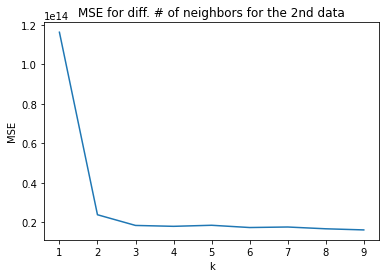

In [57]:
plt.plot([1,2,3,4,5,6,7,8,9], knn_model2_mses)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for diff. # of neighbors for the 2nd data")

## Logistic Regression Model (Classification)


In [58]:
x3 = cuny_tap_data_new.drop(columns = ["TAP College Name", "Academic Year", "TAP Sector Group_2-CUNY CC", \
                                      "TAP Level of Study_4 yr Undergrad", "TAP Level of Study_5 yr Undergrad"])

In [59]:
y3 = cuny_tap_data_new["TAP Sector Group_2-CUNY CC"]

In [60]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2)

In [61]:
x3_train.head()

,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
267,119,84.50,350276.00
178,7724,5320.67,14725594.39
55,5864,4822.29,18153387.62
227,1984,1451.58,5582126.80
287,4751,3181.42,7245694.68


In [62]:
y3.head()

0    0
1    0
2    0
3    0
4    0
Name: TAP Sector Group_2-CUNY CC, dtype: uint8

In [63]:
logit_rg_model = LogisticRegression()
logit_rg_model.fit(x3_train, y3_train)

LogisticRegression()

In [64]:
y3_test_preds_logit = logit_rg_model.predict(x3_test)

In [65]:
accuracy_score(y3_test, y3_test_preds_logit)

0.8333333333333334

<AxesSubplot:xlabel='TAP Recipient Headcount', ylabel='TAP Sector Group_2-CUNY CC'>

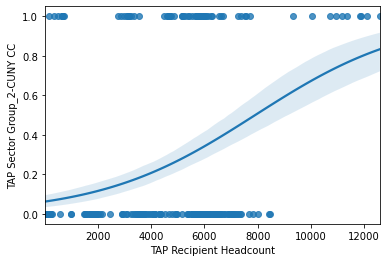

In [66]:
sns.regplot(x = "TAP Recipient Headcount" , y = y3, data = x3, logistic = True)